# Ask 1: 

### Identify and describe your dataset

Our dataset is about Brazilian E-commerce orders made at Olist store, which is the largest department store in Brazilian marketplaces. There are seven datasets in our database, including  customers dataset, orders dataset, order item dataset, order payments dataset, order reviews dataset, products dataset and sellers dataset, which allow us to analyze data in various perspectives and view each order from different dimensions.

In the customers dataset, information about the customer are included, such as the state and city location of each customer. Moreover, each customer has a unique customer_id based on each order, which can used to identify customers who repurchased at Olist store.

In the orders dataset, information about orders are included, such as the order status, when is the purchase time of the order, the estimated and actual delivery date of the order. Since we have the the estimated and actual delivery date of the order in the dataset, we additionally add a new column for calculating the difference of these two dates, which we can know more about the delivery of orders.

In the order items dataset, information about items purchased in each order are included, such as the price of the item, which seller provide the item, and the freight value of the item.

In the order payments dataset, information about what payment is used for each orders are included, such as the payment type and payment value. 

In the order reviews dataset, information about reviews made by customers are included, such as the review score, review comment, when is the date the satisfaction survey was sent to the customer and the date customer answered the  satisfaction survey. Since we have the date the satisfaction survey was sent to the customer and the date customer answered the satisfaction survey in the dataset, we additionally add a new column for calculating the difference of these two dates, which we can know more about how customer response to the satisfaction survey.

In the products dataset, information about all products sold by Olist are included, such as the product id, product category name, and product size.

In the sellers dataset, information about sellers that provide products for orders are included, such as the seller id and the state and city location of the seller.

### Identify dataset source

https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_sellers_dataset.csv

### Why is important and what appeals to you about it?

This dataset was provided by Olist, the largest department store in Brazilian marketplaces. This database allows us to have a better understanding about the Olist Onlie store's business, sales, market trends and customer base. We think this database is really close to real life business operation and it helps us to get the sense of how to use data to extract information and improve business operation. That is why we think it is important to use this database and learn analytics skills from real life business example. 

### Describe the analytical questions you want to answer with the data:

Question 1: Find the number of orders by day of the week.

Question 2: Find the top 10 product categories based on average price

Question 3: Find the average days of product delays of each state based on the difference between estimatated delivery days and actural delivery days. 

# Ask 2

### wrangle the data into a format suitable for Dimensional modeling analysis. This may involve: – Cleaning, filtering, merging , modeling steps 

#### Merging and cleaning

We used JMP to wrangle the data. 
We first joined all datasets into one single dataset using order id.
Then we deleted useless columns such including payment_installments, payment_sequential, order_approved_at, order_delivered_carrier_date, product_name_lenght, product_description_lenght, product_photos_qty.

#### Creating new columns

We used JMP to create two new columns, difference_delivered_purchase and difference_estimated_delivered.
The formula of difference_delivered_purchase is (order_delivered_customer_date - order_purchase_timestamp) / (3600 * 24), which represents the days between customers make a purchase and receive the order. 
The formula of difference_estimated_delivered is (order_estimated_delivery_date - order_delivered_customer_date) / (3600 * 24), which represents the days between the estimated delivery date and the delivery date. 

In [3]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

ipython-sql==0.3.9
psycopg2==2.7.5
psycopg2-binary==2.7.5


In [2]:
!dropdb -U student final_project

In [3]:
!createdb -U student final_project

In [1]:
%load_ext sql

In [2]:
%sql postgresql://student@/final_project

'Connected: student@final_project'

## Data Setup

In [7]:
## lets examine data. Moving it first to more friendly file name
!mv order_customer_payments_item_product_seller.csv data.csv

In [7]:
!wc -l data.csv

117602 data.csv


In [8]:
## use csvcut to find the heading (attribute labels) of the Q1 file
!csvcut -n data.csv

  1: ﻿order_purchase_timestamp
  2: order_delivered_customer_date
  3: difference_delivered_purchase
  4: order_estimated_delivery_date
  5: difference_estimated_delivered
  6: customer_unique_id
  7: customer_zip_code_prefix
  8: customer_city
  9: customer_state
 10: seller_id
 11: seller_zip_code_prefix
 12: seller_city
 13: seller_state
 14: product_id
 15: price
 16: freight_value
 17: product_category_name
 18: product_weight_g
 19: product_length_cm
 20: product_height_cm
 21: product_width_cm


## Create Table and Import

In [9]:
## let's first have a feeling for the data values in the 21 fields
!head -n 10 data.csv

﻿order_purchase_timestamp,order_delivered_customer_date,difference_delivered_purchase,order_estimated_delivery_date,difference_estimated_delivered,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_id,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2017/5/5 16:12,2017/6/2 16:57,28.03142361,2017/5/30 0:00,-3.706759259,b4527423469300ee354458e1b5f961be,32223,contagem,MG,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,f4621f8ad6f54a2e3c408884068be46d,101.7,15.92,esporte_lazer,600,35,15,28
2017/8/30 11:47,2017/9/1 16:51,2.210810185,2017/9/20 0:00,18.29761574,af0f26435fade1ca984d9affda307199,9310,maua,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,325a06bcce0da45b7f4ecf2797dd40e4,10.8,2.42,esporte_lazer,300,16,5,15
2017/8/21 20:35,2017/8/30 16:07,8.813530093,2017/9/1 0:00,1.328321759,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,S

In [10]:
## we won't be sure of our above conclusions on the data unless we examine a good sample of it. Let's do that for first 1% of the records
!head -n 1000 data.csv | csvstat

  1. "﻿order_purchase_timestamp"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         895
	Smallest value:        2016-10-08 10:55:00
	Largest value:         2018-08-28 09:18:00
	Most common values:    2018-07-12 18:57:00 (8x)
	                       2018-08-15 14:02:00 (5x)
	                       2018-01-06 23:02:00 (5x)
	                       2017-05-27 19:20:00 (4x)
	                       2018-05-07 21:54:00 (4x)

  2. "order_delivered_customer_date"

	Type of data:          DateTime
	Contains null values:  True (excluded from calculations)
	Unique values:         868
	Smallest value:        2016-10-27 10:58:00
	Largest value:         2018-09-19 15:46:00
	Most common values:    None (29x)
	                       2018-07-24 17:40:00 (8x)
	                       2018-01-22 15:12:00 (5x)
	                       2017-06-07 08:53:00 (4x)
	                       2018-05-17 20:21:00 (4x)

  3. "difference_delivered_purchase"

	Type of data:          Nu

Based on these values, We expect we can create transactional table as follows:

In [11]:
%%sql
CREATE TABLE orders_facts (
    order_purchase_timestamp TIMESTAMP,
    order_delivered_customer_date TIMESTAMP,
    difference_delivered_purchase numeric,
    order_estimated_delivery_date TIMESTAMP,
    difference_estimated_delivered numeric,
    customer_unique_id varchar(100) Not Null,
    customer_zip_code_prefix numeric,
    customer_city varchar(100),
    customer_state varchar(100),
    seller_id varchar(100) Not Null,
    seller_zip_code_prefix numeric,
    seller_city varchar(100),
    seller_state varchar(100),
    product_id varchar(100) Not Null,
    price numeric,
    freight_value numeric,
    product_category_name varchar(100),
    product_weight_g numeric,
    product_lenght_cm numeric,
    product_height_cm numeric,
    product_width_cm numeric
);

 * postgresql://student@/final_project
Done.


[]

Now we'll load the data directly using COPY command. Note that this requires the use of an absolute path, so adjust it to your location:

In [12]:
!cp data.csv /tmp/data.csv

In [13]:
%%sql
COPY orders_facts FROM '/tmp/data.csv'
CSV
HEADER;

 * postgresql://student@/final_project
117601 rows affected.


[]

~12K records were loaded into the database. We can check the count using SQL.

In [14]:
%%sql
SELECT COUNT(*) FROM orders_facts;

 * postgresql://student@/final_project
1 rows affected.


count
117601


In [15]:
!wc -l data.csv

117602 data.csv


let's have a look at few loaded db records to make sure the data was loaded successfully.

In [17]:
%%sql
SELECT * FROM orders_facts
LIMIT 10

 * postgresql://student@/final_project
10 rows affected.


order_purchase_timestamp,order_delivered_customer_date,difference_delivered_purchase,order_estimated_delivery_date,difference_estimated_delivered,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_id,price,freight_value,product_category_name,product_weight_g,product_lenght_cm,product_height_cm,product_width_cm
2017-05-05 16:12:00,2017-06-02 16:57:00,28.03142361,2017-05-30 00:00:00,-3.706759259,b4527423469300ee354458e1b5f961be,32223,contagem,MG,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,f4621f8ad6f54a2e3c408884068be46d,101.7,15.92,esporte_lazer,600,35,15,28
2017-08-30 11:47:00,2017-09-01 16:51:00,2.210810185,2017-09-20 00:00:00,18.29761574,af0f26435fade1ca984d9affda307199,9310,maua,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,325a06bcce0da45b7f4ecf2797dd40e4,10.8,2.42,esporte_lazer,300,16,5,15
2017-08-21 20:35:00,2017-08-30 16:07:00,8.813530093,2017-09-01 00:00:00,1.328321759,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,ffb64e34a37740dafb6c88f1abd1fa61,106.2,9.56,esporte_lazer,700,43,15,35
2017-04-28 14:20:00,2017-05-09 14:27:00,11.00483796,2017-06-01 00:00:00,22.3978588,00ac9cd5c4ad19e16e7c6f6864711737,37500,itajuba,MG,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,765c417cdc38443aaa558a0159a98591,209.9,21.55,malas_acessorios,3500,40,55,25
2017-04-27 09:09:00,2017-05-04 13:20:00,7.173877315,2017-06-06 00:00:00,32.44436343,51dc56123336c573f2977f5da81b17b9,20251,rio de janeiro,RJ,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,765c417cdc38443aaa558a0159a98591,209.9,21.55,malas_acessorios,3500,40,55,25
2018-04-09 23:40:00,2018-04-30 18:41:00,20.79236111,2018-04-30 00:00:00,-0.778541667,177e10134f99776d8a2b0c10c3fed38c,37190,tres pontas,MG,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,cb378611bbb39f1716b4f0c335201448,399.99,36.34,malas_acessorios,16850,38,58,25
2017-05-07 12:42:00,2017-05-19 10:07:00,11.8921875,2017-06-01 00:00:00,12.57799769,28b9099dc6577fdeceb2e4468e69f556,88440,imbuia,SC,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,d46169ff14ef99286a176b5391a7a1c8,1197.9,130.18,malas_acessorios,22600,37,80,60
2017-05-24 21:02:00,2017-06-02 10:48:00,8.573275463,2017-06-21 00:00:00,18.54983796,20555f7b2372553063a07264ff6d3808,71727,brasilia,DF,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,aab5e2a4e6a2434fb61e694ed85a9888,129.9,15.66,papelaria,1800,32,40,16
2017-05-23 23:25:00,2017-05-28 02:48:00,4.141122685,2017-06-14 00:00:00,16.88275463,ff2cfbe44d7249b98eed0e860fe3e53c,2310,sao paulo,SP,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2020db9c389956e879dd05e6250413d8,229.9,13.11,malas_acessorios,4000,38,52,22
2017-05-23 23:25:00,2017-05-28 02:48:00,4.141122685,2017-06-14 00:00:00,16.88275463,ff2cfbe44d7249b98eed0e860fe3e53c,2310,sao paulo,SP,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,d3d5a1d52abe9a7d234908d873fc377b,229.9,13.11,malas_acessorios,4900,38,55,22


So far so good. Next we need to look at the current transactional design and build the dimensional equivalent to the design

## More ETL with SQL

Today we started with this schema: 

In [6]:
from IPython.display import Image

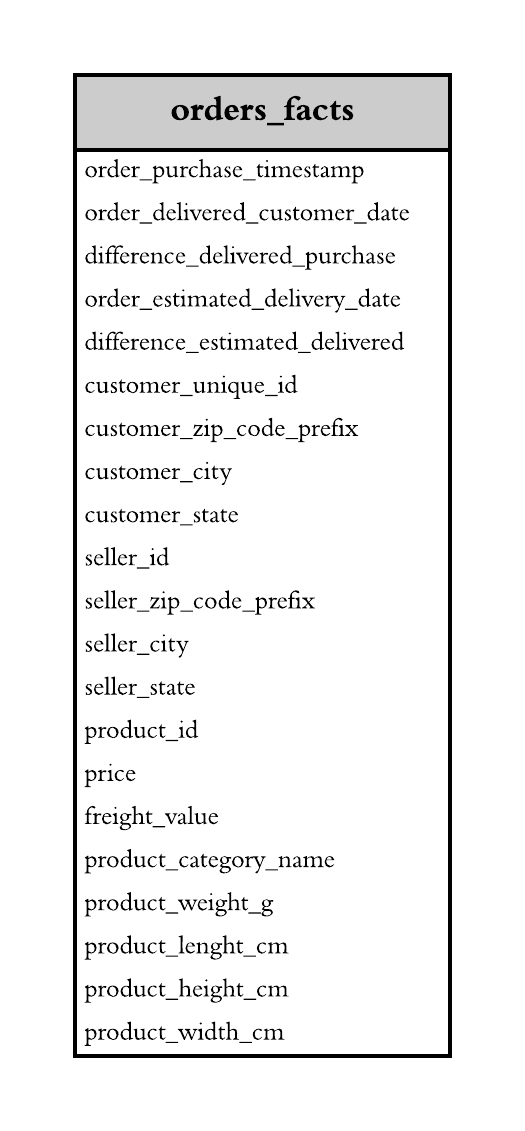

In [7]:
Image("image1.png")

our aim is to build a star schema that allow us to do analytical analysis and business intellegence on the data. I have created a star schema for discussion. Let's go over the design.

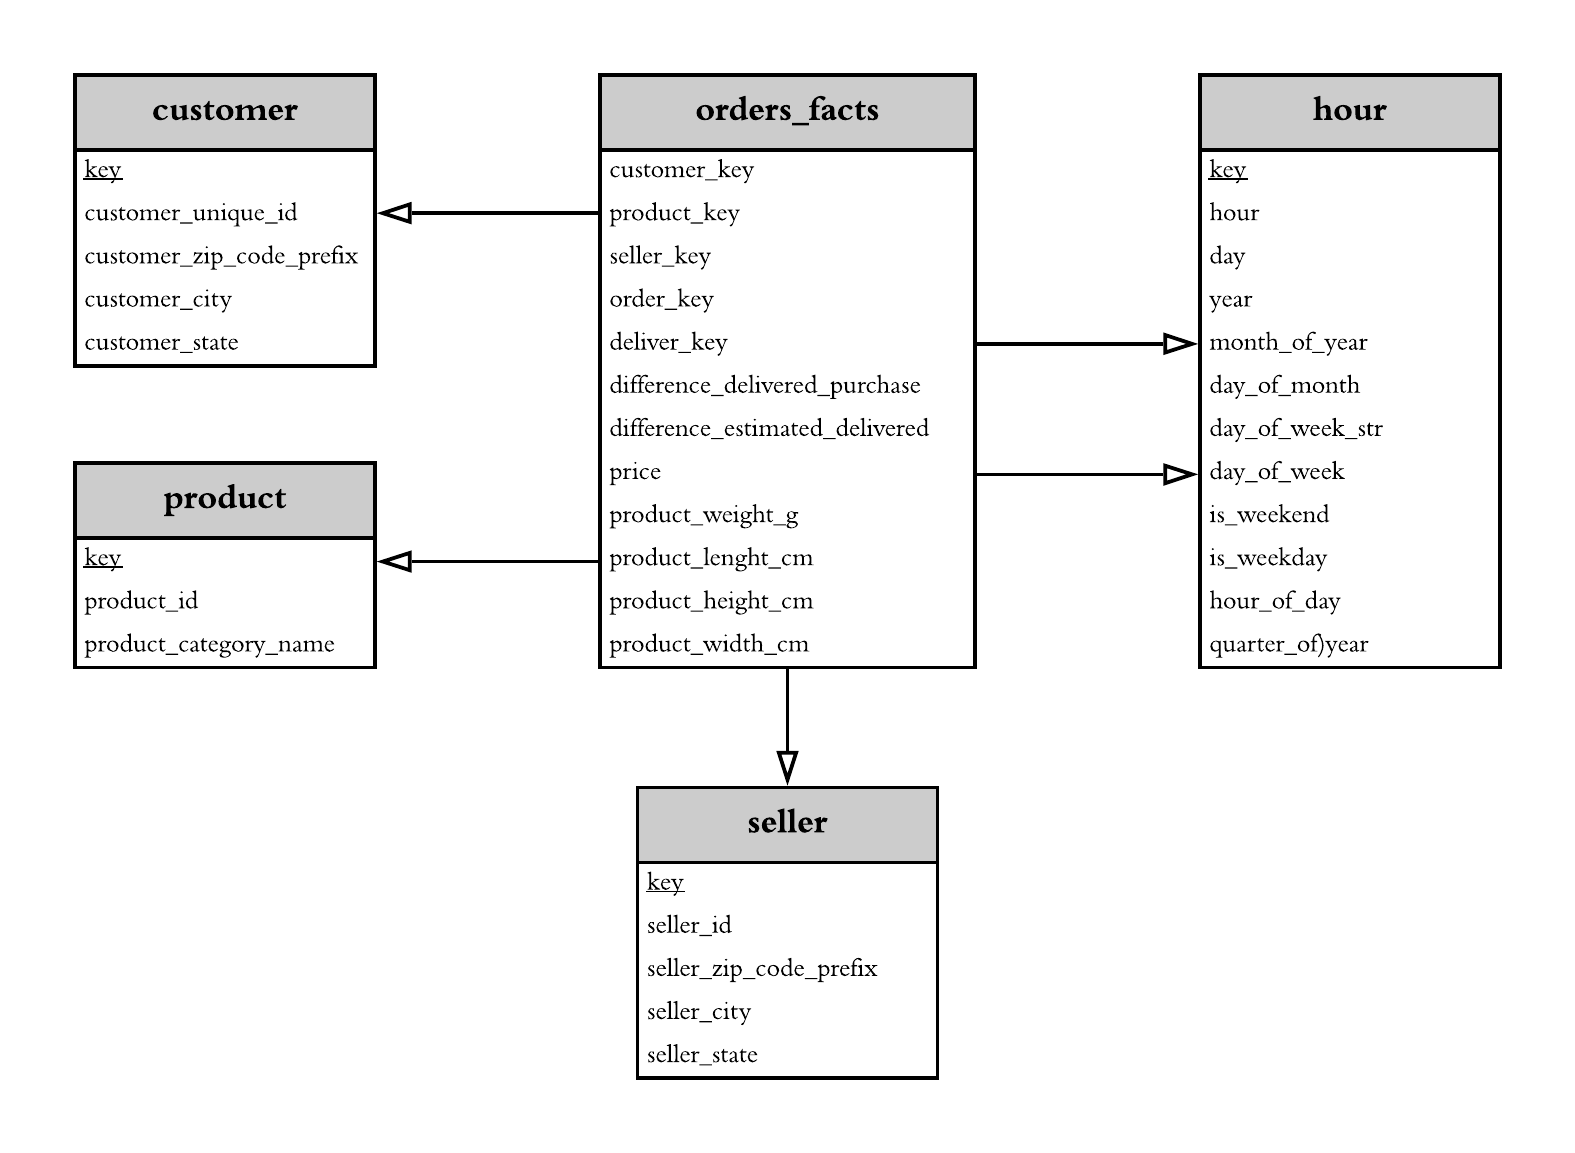

In [8]:
Image("image2.png")

Now we can create a new dimension table to house the unique station ids and names. For key we use the data type serial. Check Postgresql documentation @ https://www.postgresql.org/docs/9.5/datatype-numeric.html#DATATYPE-SERIAL serial is the equivalent of creating a sequence that its value is equal to the largest number in the table + 1.

Customer Dimension

In [18]:
%%sql
DROP TABLE IF EXISTS customer;

CREATE TABLE customer (
    key SERIAL PRIMARY KEY,
    customer_unique_id varchar(100) Not Null,
    customer_zip_code_prefix numeric,
    customer_city varchar(100),
    customer_state varchar(100)
);

 * postgresql://student@/final_project
Done.
Done.


[]

Upload customer information using the union query. serial will automatically insert a serial integer into the table

In [19]:
%%sql
INSERT INTO customer (customer_unique_id, customer_zip_code_prefix, customer_city, customer_state)
SELECT DISTINCT customer_unique_id AS customer_unique_id, 
    customer_zip_code_prefix AS customer_zip_code_prefix,
    customer_city AS customer_city,
    customer_state AS customer_state
FROM orders_facts
UNION
SELECT DISTINCT customer_unique_id AS customer_unique_id, 
    customer_zip_code_prefix AS customer_zip_code_prefix,
    customer_city AS customer_city,
    customer_state AS customer_state
FROM orders_facts;

 * postgresql://student@/final_project
95670 rows affected.


[]

In [20]:
%%sql
SELECT * FROM customer
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


key,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1,233bced31686284a380870eb2761109f,18480,itaporanga,SP
2,fe25d225d2494b252321b09821ebdbdf,27420,quatis,RJ
3,92b18241cb0ae7c3be4c5c9e4b9db371,22743,rio de janeiro,RJ
4,edc699eb8c0fc6ec7a6ec536382840b3,6714,cotia,SP
5,41415f9d98446c12f76c9c4d5af62b03,6730,vargem grande paulista,SP
6,bb182f55e4cff6eabfc26d08354b5995,95900,lajeado,RS
7,37b708a378a17996174d1b8f6ed3d3e9,20720,rio de janeiro,RJ
8,9aba54994850ca5befd6f16384e925b2,60140,fortaleza,CE
9,ead79bd27a251fe8a2070b1304f10044,37270,campo belo,MG
10,59cd47f7d0957b3cf7860f25986cf4b5,21760,rio de janeiro,RJ


We now add FK customer_key to the fact table. repeat of step 1-3 as describes below

In [21]:
%%sql
-- Step 1
ALTER TABLE orders_facts 
ADD COLUMN customer_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_customer
    FOREIGN KEY (customer_key)
    REFERENCES customer (key);

 * postgresql://student@/final_project
Done.


[]

Now we update the customer_key in the fact table with the values from customer dimension table based on unique customers.

In [22]:
%%sql
-- Step 3
UPDATE orders_facts AS f
SET customer_key = c.key
FROM customer AS c
WHERE f.customer_unique_id = c.customer_unique_id;

 * postgresql://student@/final_project
117601 rows affected.


[]

Product Dimension

In [23]:
%%sql
DROP TABLE IF EXISTS product;

CREATE TABLE product (
    key SERIAL PRIMARY KEY,
    product_id varchar(100) Not Null,
    product_category_name varchar(100)
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [24]:
%%sql
INSERT INTO product (product_id, product_category_name)
SELECT DISTINCT product_id AS product_id, 
    product_category_name AS product_category_name
FROM orders_facts
UNION
SELECT DISTINCT product_id AS product_id, 
    product_category_name AS product_category_name
FROM orders_facts;

 * postgresql://student@/final_project
32951 rows affected.


[]

In [25]:
%%sql
SELECT * FROM product
LIMIT 5;

 * postgresql://student@/final_project
5 rows affected.


key,product_id,product_category_name
1,59542ce967e2cbc86b0cfd48baf77d96,informatica_acessorios
2,0a2fff0d95ef3bbb7dffc618f9542ba9,relogios_presentes
3,87f87c717c93f801e1a62367ce5ff63f,construcao_ferramentas_iluminacao
4,c03538c4936ed498a78ab92db5105f46,utilidades_domesticas
5,112dad9870ca76046f327b9c08f00b29,brinquedos


Load order_reviews.csv into relational database

In [26]:
%%sql
-- Step 1
ALTER TABLE orders_facts 
ADD COLUMN product_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_product
    FOREIGN KEY (product_key)
    REFERENCES product (key);

 * postgresql://student@/final_project
Done.


[]

In [27]:
%%sql
-- Step 3
UPDATE orders_facts AS f
SET product_key = p.key
FROM product AS p
WHERE f.product_id = p.product_id;

 * postgresql://student@/final_project
117601 rows affected.


[]

Seller Dimension

In [28]:
%%sql
DROP TABLE IF EXISTS seller;

CREATE TABLE seller (
    key SERIAL PRIMARY KEY,
    seller_id varchar(100) Not Null,
    seller_zip_code_prefix numeric,
    seller_city varchar(100),
    seller_state varchar(100)
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [29]:
%%sql
INSERT INTO seller (seller_id, seller_zip_code_prefix, seller_city, seller_state)
SELECT DISTINCT seller_id AS seller_id, 
    seller_zip_code_prefix AS seller_zip_code_prefix,
    seller_city AS seller_city,
    seller_state AS seller_state
FROM orders_facts
UNION
SELECT DISTINCT seller_id AS seller_id, 
    seller_zip_code_prefix AS seller_zip_code_prefix,
    seller_city AS seller_city,
    seller_state AS seller_state
FROM orders_facts;

 * postgresql://student@/final_project
3095 rows affected.


[]

In [30]:
%%sql
select *
from seller
limit 5

 * postgresql://student@/final_project
5 rows affected.


key,seller_id,seller_zip_code_prefix,seller_city,seller_state
1,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
2,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
3,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
4,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP
5,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


In [31]:
%%sql
-- Step 1
ALTER TABLE orders_facts 
ADD COLUMN seller_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_seller
    FOREIGN KEY (seller_key)
    REFERENCES seller (key);

 * postgresql://student@/final_project
Done.


[]

In [32]:
%%sql
-- Step 3
UPDATE orders_facts AS f
SET seller_key = s.key
FROM seller AS s
WHERE f.seller_id = s.seller_id;

 * postgresql://student@/final_project
117601 rows affected.


[]

### Creating the hour dimension table
#### Link hour dimension table to the orders_facts table

In [33]:
%%sql
SELECT DISTINCT TO_CHAR(order_purchase_timestamp, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(order_purchase_timestamp, 'YYYY-MM-DD') AS day, 
    TO_CHAR(order_purchase_timestamp, 'YYYY') AS year,
    TO_CHAR(order_purchase_timestamp, 'Month') AS month_of_year_str,
    TO_CHAR(order_purchase_timestamp, 'MM') AS month_of_year,
    TO_CHAR(order_purchase_timestamp, 'DD') AS day_of_month,
    TO_CHAR(order_purchase_timestamp, 'Day') AS day_of_week_str,
    TO_CHAR(order_purchase_timestamp, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(order_purchase_timestamp, 'D') AS INTEGER) >= 6 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(order_purchase_timestamp, 'D') AS INTEGER) < 6 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(order_purchase_timestamp, 'HH24') AS hour_of_day,
    TO_CHAR(order_purchase_timestamp, 'Q') AS quarter_of_year
FROM orders_facts
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
2016-09-04 21:00:00,2016-09-04,2016,September,09,04,Sunday,1,false,true,21,3
2016-09-05 00:00:00,2016-09-05,2016,September,09,05,Monday,2,false,true,00,3
2016-10-02 22:00:00,2016-10-02,2016,October,10,02,Sunday,1,false,true,22,4
2016-10-03 09:00:00,2016-10-03,2016,October,10,03,Monday,2,false,true,09,4
2016-10-03 16:00:00,2016-10-03,2016,October,10,03,Monday,2,false,true,16,4
2016-10-03 21:00:00,2016-10-03,2016,October,10,03,Monday,2,false,true,21,4
2016-10-03 22:00:00,2016-10-03,2016,October,10,03,Monday,2,false,true,22,4
2016-10-04 09:00:00,2016-10-04,2016,October,10,04,Tuesday,3,false,true,09,4
2016-10-04 10:00:00,2016-10-04,2016,October,10,04,Tuesday,3,false,true,10,4
2016-10-04 11:00:00,2016-10-04,2016,October,10,04,Tuesday,3,false,true,11,4


creating dimension table Hour

In [34]:
%%sql
DROP TABLE IF EXISTS hour;

CREATE TABLE hour (
    key SERIAL PRIMARY KEY,
    hour CHAR(19),
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

 * postgresql://student@/final_project
Done.
Done.


[]

Populating dimension table hour with data from orders_facts (union of order_purchase_timestamp and order_delivered_customer_date)

In [35]:
%%sql
INSERT INTO hour (hour, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_CHAR(order_purchase_timestamp, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(order_purchase_timestamp, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(order_purchase_timestamp, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(order_purchase_timestamp, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(order_purchase_timestamp, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(order_purchase_timestamp, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(order_purchase_timestamp, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(order_purchase_timestamp, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(order_purchase_timestamp, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(order_purchase_timestamp, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(order_purchase_timestamp, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(order_purchase_timestamp, 'Q') AS INTEGER) AS quarter_of_year
FROM orders_facts
UNION
SELECT DISTINCT TO_CHAR(order_delivered_customer_date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(order_delivered_customer_date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(order_delivered_customer_date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(order_delivered_customer_date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(order_delivered_customer_date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(order_delivered_customer_date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(order_delivered_customer_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(order_delivered_customer_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(order_delivered_customer_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(order_delivered_customer_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(order_delivered_customer_date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(order_delivered_customer_date, 'Q') AS INTEGER) AS quarter_of_year
FROM orders_facts;

 * postgresql://student@/final_project
12923 rows affected.


[]

In [36]:
%%sql
SELECT * FROM hour
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2016-09-04 21:00:00,2016-09-04,2016,September,9,4,Sunday,1,True,False,21,3
2,2016-09-05 00:00:00,2016-09-05,2016,September,9,5,Monday,2,False,True,0,3
3,2016-10-02 22:00:00,2016-10-02,2016,October,10,2,Sunday,1,True,False,22,4
4,2016-10-03 09:00:00,2016-10-03,2016,October,10,3,Monday,2,False,True,9,4
5,2016-10-03 16:00:00,2016-10-03,2016,October,10,3,Monday,2,False,True,16,4
6,2016-10-03 21:00:00,2016-10-03,2016,October,10,3,Monday,2,False,True,21,4
7,2016-10-03 22:00:00,2016-10-03,2016,October,10,3,Monday,2,False,True,22,4
8,2016-10-04 09:00:00,2016-10-04,2016,October,10,4,Tuesday,3,False,True,9,4
9,2016-10-04 10:00:00,2016-10-04,2016,October,10,4,Tuesday,3,False,True,10,4
10,2016-10-04 11:00:00,2016-10-04,2016,October,10,4,Tuesday,3,False,True,11,4


We now add FK start_hour_key to the fact table. repeat of step 1-3 as describes above

In [37]:
%%sql
-- Step 1
ALTER TABLE orders_facts 
ADD COLUMN order_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_order_hour
    FOREIGN KEY (order_key)
    REFERENCES hour (key);

 * postgresql://student@/final_project
Done.


[]

Now we update the start_hour_key in the fact table with the values from hour dimension table based on start time of the trips.

In [38]:
%%sql
-- Step 3
UPDATE orders_facts
SET order_key = hour.key
FROM hour
WHERE TO_CHAR(orders_facts.order_purchase_timestamp, 'YYYY-MM-DD HH24:00:00') = hour.hour;

 * postgresql://student@/final_project
117601 rows affected.


[]

Do the same for the deliver_key

In [39]:
%%sql
-- Step 1
ALTER TABLE orders_facts 
ADD COLUMN deliver_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_deliver_hour
    FOREIGN KEY (deliver_key)
    REFERENCES hour (key);

 * postgresql://student@/final_project
Done.


[]

In [40]:
%%sql
-- step 3
UPDATE orders_facts
SET deliver_key = hour.key
FROM hour
WHERE TO_CHAR(orders_facts.order_delivered_customer_date, 'YYYY-MM-DD HH24:00:00') = hour.hour;

 * postgresql://student@/final_project
115034 rows affected.


[]

We can drop columns from orders_facts table

In [41]:
%%sql
ALTER TABLE orders_facts 
DROP COLUMN order_purchase_timestamp,
DROP COLUMN order_delivered_customer_date,
DROP COLUMN order_estimated_delivery_date,
DROP COLUMN customer_unique_id,
DROP COLUMN customer_zip_code_prefix,
DROP COLUMN customer_city,
DROP COLUMN customer_state,
DROP COLUMN seller_id,
DROP COLUMN seller_zip_code_prefix,
DROP COLUMN seller_city,
DROP COLUMN seller_state,
DROP COLUMN product_id,
DROP COLUMN freight_value,
DROP COLUMN product_category_name;

 * postgresql://student@/final_project
Done.


[]

In [42]:
%%sql
SELECT * FROM orders_facts
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


difference_delivered_purchase,difference_estimated_delivered,price,product_weight_g,product_lenght_cm,product_height_cm,product_width_cm,customer_key,product_key,seller_key,order_key,deliver_key
None,None,32.9,1800,32,6,28,68786,31248,247,1,None
None,None,39.99,1400,32,6,28,68786,24855,247,1,None
None,None,59.5,700,25,2,25,27114,31388,1999,2,None
None,None,100,500,18,18,18,5492,27139,446,3,None
None,None,164,900,28,18,14,16038,32143,1681,12,None
None,None,189.9,400,19,7,17,80715,27727,890,12,None
None,None,239.9,400,18,16,16,73027,23180,2203,13,None
None,None,22.37,900,16,34,34,17411,22225,288,14,None
None,None,599,20100,90,60,20,26169,7464,808,15,None
None,None,129.9,700,31,5,25,20610,2259,1170,19,None


Now we are ready to explore the data.

# Ask 3

#### Business Question BQ1

Find the number of orders by day of the week.

In [42]:
%%sql
SELECT day_of_week, day_of_week_str, COUNT(*) count
FROM orders_facts
JOIN hour
  ON orders_facts.order_key = hour.key
GROUP BY day_of_week_str, day_of_week
ORDER BY day_of_week;

 * postgresql://student@/final_project
7 rows affected.


day_of_week,day_of_week_str,count
1,Sunday,13936
2,Monday,19130
3,Tuesday,19077
4,Wednesday,18380
5,Thursday,17590
6,Friday,16760
7,Saturday,12728


Interpretation: customers tend to place more orders on Monday and Tuesday. Therefore, sellers could invest more on Monday and Tuesday' marketing.

In [43]:
%matplotlib inline

<BarContainer object of 7 artists>

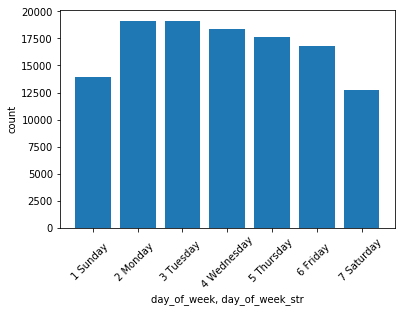

In [44]:
_.bar()

#### BQ2: 
Find the top 10 product categories based on average price

In [48]:
%%sql
SELECT round(AVG(price),2) as average_price, p.product_category_name
FROM orders_facts
JOIN product AS p
  ON orders_facts.product_key = p.key
GROUP BY p.product_category_name
ORDER BY average_price DESC 
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


average_price,product_category_name
1103.69,pcs
627.51,portateis_casa_forno_e_cafe
459.95,eletrodomesticos_2
332.71,agro_industria_e_comercio
293.77,instrumentos_musicais
286.61,eletroportateis
264.57,portateis_cozinha_e_preparadores_de_alimentos
227.68,telefonia_fixa
210.94,construcao_ferramentas_seguranca
202.09,relogios_presentes


Interpretation: Olist and sellers could generate more revenue by increasing sales in computers, small appliances, home appliances, and musical instruments.

#### BQ3:  
Find the average days of product delays of each state based on the difference between estimatated delivery days and actural delivery days. 

In [6]:
%%sql
SELECT round(AVG(f.difference_estimated_delivered),2) as average_delay, c.customer_state
FROM orders_facts AS f
JOIN customer AS c
  ON f.customer_key = c.key
GROUP BY c.customer_state
HAVING round(AVG(f.difference_estimated_delivered),2) IS NOT NULL
ORDER BY average_delay DESC;

 * postgresql://student@/final_project
27 rows affected.


average_delay,customer_state
20.54,AC
19.26,RO
19.15,AM
18.03,AP
17.62,RR
13.69,MT
13.60,PA
13.49,RS
13.00,RN
12.82,PE


Interpretation: Customers in AC, RO, and AM have the worst delivery experience. Olist and sellers should come up with better delivery solutions to increase customer experience.